<a href="https://colab.research.google.com/github/Sillians/Hyperparameter-Optimization-for-Xgboost-using-RandomizedSearchCV/blob/master/Hyperparameter_Optimization_for_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hyperparameter Optimization For Xgboost using RandomizedSearchCV**

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance

In [0]:
#Import Libraries
import pandas as pd
import numpy as np

#!pip install 

**OBJECTIVE**

**we are going to build and train a model that predict which customers may churn in future so that they can take steps to incentivise those customers to stay. We will classify the predictions of those customers in either exited or stayed in binary classification (0 and 1)**

In [0]:
#Read our Dataset
df = pd.read_csv('Churn_Modelling.csv')

In [64]:
#Display our Dataset header(Few Dataset)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


EXPLORATORY DATA ANALYSIS ON OUR DATA

In [65]:
#Shape of our Dataset(Rows and columns)
df.shape

(10000, 14)

In [66]:
#This gives us a datatypes of our Dataset
#From here we can note that Geography and Gender are Object Datatypes
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [67]:
#This gives us a clue 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


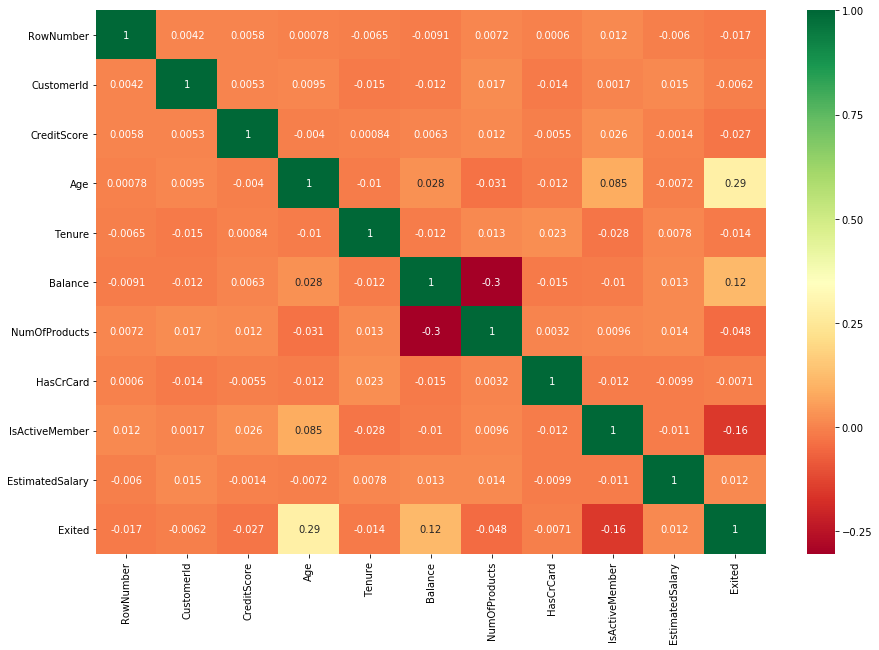

In [68]:
#Check for Correlation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Get Correlation of each features in dataset
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(15,10), facecolor="w", edgecolor='blue')

#Plot Heatmap
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [0]:
#We divide our Dataset into Features and Target variable
X=df.iloc[:,3:13]

In [70]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [0]:
y=df.iloc[:,13]

In [72]:
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

In [0]:
#So looking at our Feature Dataset, We have Categorical variables in Geography and gender Column
#As part of Feature Engineering, we convert those features to Dummy Variables
geography = pd.get_dummies(X["Geography"], drop_first=True)

In [74]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [0]:
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [76]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [0]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [79]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [0]:
#Concatenate the Geography and Gender Features
X=pd.concat([X, geography, gender],axis=1)

In [82]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [0]:
#using XGboost Algorithm and R
import sklearn
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

**GRIDSEARCH**

**The traditional way of performing hyperparameter optimization has been grid search, or a parameter sweep, which is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. A grid search algorithm must be guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.**

**RANDOM SEARCH**

**Random Search replaces the exhaustive enumeration of all combinations by selecting them randomly. This can be simply applied to the discrete setting described above, but also generalizes to continuous and mixed spaces. It can outperform Grid search, especially when only a small number of hyperparameters affects the final performance of the machine learning algorithm. In this case, the optimization problem is said to have a low intrinsic dimensionality.  Random Search is also embarrassingly parallel, and additionally allows the inclusion of prior knowledge by specifying the distribution from which to sample.**

**Gradient-based optimization**

For specific learning algorithms, it is possible to compute the gradient with respect to hyperparameters and then optimize the hyperparameters using gradient descent. The first usage of these techniques was focused on neural networks. Since then, these methods have been extended to other models such as support vector machines  or logistic regression.

A different approach in order to obtain a gradient with respect to hyperparameters consists in differentiating the steps of an iterative optimization algorithm using automatic differentiation

In [0]:
#Hyperparamater Optimization
params= {"Learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35],
          "max_depth"    : [3, 4, 5, 6, 8, 10, 12, 14, 15],
      "min_child_weight" : [1, 3, 5, 7],
         "gamma"         : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree"   : [0.3, 0.4, 0.5, 0.6, 0.7]
}

In [0]:
#This is to tell how much time it will take to execute this whole RandomizedSearch
def timer(start_time=None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec =divmod(temp_sec, 60)
    print('\n Time Taken: %i Hours %i Minutes %s Seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
#Instantiate our Classifier
Classifier = xgboost.XGBClassifier()

In [0]:
random_search = RandomizedSearchCV(Classifier, param_distributions=params, n_iter=10, scoring="roc_auc", 
                                   n_jobs=-1, cv=5, verbose=5)

In [126]:
from datetime import datetime

start_time = timer(None) #Timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) #Timing ends here for 'start_time' variable

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   29.2s finished



 Time Taken: 0 Hours 0 Minutes 29.88 Seconds.


In [127]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [128]:
random_search.best_estimator_

XGBClassifier(Learning_rate=0.1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [129]:
random_search.best_params_

{'Learning_rate': 0.1,
 'colsample_bytree': 0.4,
 'gamma': 0.2,
 'max_depth': 5,
 'min_child_weight': 3}

In [0]:
Classifier = xgboost.XGBClassifier(Learning_rate=0.1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              gamma=0.2, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
score=cross_val_score(Classifier,X,y,cv=10)

In [138]:
score

array([0.87312687, 0.86313686, 0.87512488, 0.869     , 0.861     ,
       0.857     , 0.869     , 0.87487487, 0.86186186, 0.85985986])

In [141]:
score.mean()

0.8663985207985208

In [0]:
#from datetime import datetime,timedelta
#today=datetime.today()
#print("Todays Date:",today)
#yesterday=today-datetime,timedelta(days=1)
#print("Yesterday date:",yesterday)
#tommorrow=today+datetime.timedelta(days=1)
#print("Tommorrow Date:",tommorrow)

In [143]:
#Just trying something different here
#Returns the Year,month, date and time in hour, minute, seconds and microsecond
import datetime

x = datetime.datetime.now()
print(x)

2019-06-30 00:12:41.827820


In [144]:
#Return the year and name of weekday:
import datetime

x = datetime.datetime.now()

print(x.year)
print(x.strftime("%A"))

2019
Sunday


In [145]:
#Create a date object:
import datetime

x = datetime.datetime(2020, 5, 17)

print(x)

2020-05-17 00:00:00


**The strftime() Method**

In [146]:
import datetime

x = datetime.datetime(2018, 6, 1)

print(x.strftime("%B"))

June


In [148]:
x = datetime.datetime.now()

#Weekday, short version
print(x.strftime("%a"))

Sun


In [150]:
#Weekday, full version
print(x.strftime("%A"))

Sunday


In [151]:
#Weekday as a number 0-6, 0 is Sunday

print(x.strftime("%w"))

0


In [152]:
#Day of month 01-31
print(x.strftime("%d"))

30


In [154]:
#Month name, short version
print(x.strftime("%b"))

Jun


In [155]:
#	Month name, full version
print(x.strftime("%B"))

June


In [156]:
#Month as a number 01-12
print(x.strftime("%m"))

06


In [157]:
#Year, short version, without century
print(x.strftime("%y"))

19


In [159]:
#Year, full version
print(x.strftime("%Y"))

2019


In [161]:
#Local version of date and time
print(x.strftime("%c"))

Sun Jun 30 00:16:59 2019


In [162]:
#Local version of date
print(x.strftime("%x"))

06/30/19


In [163]:
#Local version of time
print(x.strftime("%X"))

00:16:59


In [164]:
#Hour 00-23
print(x.strftime("%H"))

00


In [165]:
#Hour 00-12
print(x.strftime("%I"))

12


In [178]:
#AM/PM
x = datetime.datetime.now()

print(x)
print(x.strftime("%p"))

2019-06-30 00:31:47.104667
AM


In [179]:
#Week number of year, Monday as the first day of week, 00-53

print(x.strftime("%W"))

25
